# How to Remove Trends and Seasonality with a Difference Transform in Python
Time series datasets may contain trends and seasonality, which may need to be removed prior to modeling.

Trends can result in a varying mean over time, whereas seasonality can result in a changing variance over time, both which define a time series as being non-stationary. Stationary datasets are those that have a stable mean and variance, and are in turn much easier to model.

Differencing is a popular and widely used data transform for making time series data stationary.

In this tutorial, you will discover how to apply the difference operation to your time series data with Python.

After completing this tutorial, you will know:

* The contrast between a stationary and non-stationary time series and how to make a series stationary with a difference transform.
* How to apply the difference transform to remove a linear trend from a series.
* How to apply the difference transform to remove a seasonal signal from a series.

Let’s get started.

## Tutorial Overview
This tutorial is divided into 4 parts; they are:

1. Stationarity
2. Difference Transform
3. Differencing to Remove Trends
4. Differencing to Remove Seasonality

## Stationarity
Time series is different from more traditional classification and regression predictive modeling problems.

The temporal structure adds an order to the observations. This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically.

For example, when modeling, there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as the time series being stationary.

These assumptions can be easily violated in time series by the addition of a trend, seasonality, and other time-dependent structures.

### Stationary Time Series
The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary.

### Non-Stationary Time Series
Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing stationary effects.

### Making Series Data Stationary
You can check if your time series is stationary by looking at a line plot of the series over time.

Sign of obvious trends, seasonality, or other systematic structures in the series are indicators of a non-stationary series.

A more accurate method would be to use a statistical test, such as the Dickey-Fuller test.

Should you make your time series stationary?

Generally, yes.

If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.

Statistical time series methods and even modern machine learning methods will benefit from the clearer signal in the data.

## Difference Transform
Differencing is a method of transforming a time series dataset.

It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality.

Differencing is performed by subtracting the previous observation from the current observation.

In [ ]:
difference(t) = observation(t) - observation(t-1)

Inverting the process is required when a prediction must be converted back into the original scale.

This process can be reversed by adding the observation at the prior time step to the difference value.

In [ ]:
inverted(t) = differenced(t) + observation(t-1)

In this way, a series of differences and inverted differences can be calculated.

### Lag Difference
Taking the difference between consecutive observations is called a lag-1 difference.

The lag difference can be adjusted to suit the specific temporal structure.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

### Difference Order
Some temporal structure may still exist after performing a differencing operation, such as in the case of a nonlinear trend.

As such, the process of differencing can be repeated more than once until all temporal dependence has been removed.

The number of times that differencing is performed is called the difference order.

### Calculating Differencing
We can difference the dataset manually.

This involves developing a new function that creates a differenced dataset. The function would loop through a provided series and calculate the differenced values at the specified interval or lag.

The function below named difference() implements this procedure.

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

We can see that the function is careful to begin the differenced dataset after the specified interval to ensure differenced values can, in fact, be calculated. A default interval or lag value of 1 is defined. This is a sensible default.

One further improvement would be to also be able to specify the order or number of times to perform the differencing operation.

The function below named inverse_difference() inverts the difference operation for a single forecast. It requires that the real observation value for the previous time step also be provided.

In [ ]:
# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob

### Differencing to Remove Trends
In this section, we will look at using the difference transform to remove a trend.

A trend makes a time series non-stationary by increasing the level. This has the effect of varying the mean time series value over time.

The example below applies the difference() function to a contrived dataset with a linearly increasing trend.

In [1]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob
 
# define a dataset with a linear trend
data = [i+1 for i in range(20)]
print(data)
# difference the dataset
diff = difference(data)
print(diff)
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
print(inverted)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Running the example first prints the contrived sequence with a linear trend. Next, the differenced dataset is printed showing the increase by one unit each time step. The length of this sequence is 19 instead of 20 as the difference for the first value in the sequence cannot be calculated as there is no prior value.

Finally, the difference sequence is inverted using the prior values from the original sequence as the primer for each transform.

## Differencing to Remove Seasonality
In this section, we will look at using the difference transform to remove seasonality.

Seasonal variation, or seasonality, are cycles that repeat regularly over time.

There are many types of seasonality. Some obvious examples include; time of day, daily, weekly, monthly, annually, and so on. As such, identifying whether there is a seasonality component in your time series problem is subjective.

The simplest approach to determining if there is an aspect of seasonality is to plot and review your data, perhaps at different scales and with the addition of trend lines.

The example below applies the difference() function to a contrived seasonal dataset. The dataset includes two cycles of 360 units each.

In [9]:
%matplotlib inline

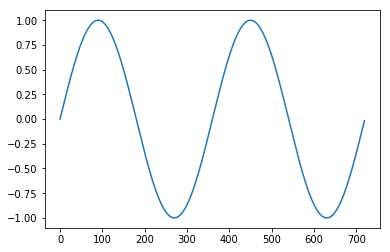

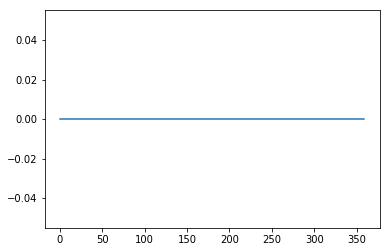

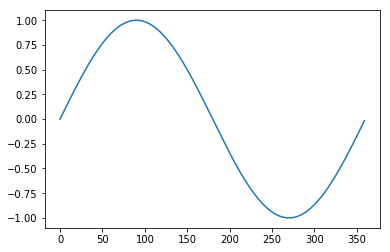

In [10]:
from math import sin
from math import radians
from matplotlib import pyplot

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob
 
# define a dataset with a linear trend
data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]
pyplot.plot(data)
pyplot.show()
# difference the dataset
diff = difference(data, 360)
pyplot.plot(diff)
pyplot.show()
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
pyplot.plot(inverted)
pyplot.show()

Running the example first creates and plots the dataset of two cycles of the 360 time step series.

Next, the difference transform is applied and the result is plotted. The plot shows 360 zero values with all seasonality signal removed.

In the de-trending example above, differencing was applied with a lag of 1, which means the first value was sacrificed. Here an entire cycle is used for differencing, that is 360 time steps. The result is that the entire first cycle is sacrificed in order to difference the second cycle.

Finally, the transform is inverted showing the second cycle with the seasonality restored.

## Summary
In this tutorial, you discovered the distinction between stationary and non-stationary time series and how to use the difference transform to remove trends and seasonality with Python.

Specifically, you learned:

* The contrast between a stationary and non-stationary time series and how to make a series stationary with a difference transform.
* How to apply the difference transform to remove a linear trend from a series.
* How to apply the difference transform to remove a seasonal signal from a series.